---
## 4.  Decision Tree

<i>Having clustered the restaurants into groups, we tried to use this information to develop a decision tree classification model which can help us to estimate what are the features of an awarded japanese restaurant (or a non-awarded japanese restaurant).
</i>

In [50]:
import pandas as pd #for data manipulation 
import numpy as np # NumPy is a library working for array
import matplotlib.pyplot as plt #for ploting graphs
import seaborn as sns # Import seaborn library for ploting graphs
import sklearn # Import machine learning library
from sklearn import datasets, preprocessing
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split #split array into random train and test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report # for decision tree analysis

In [51]:
Dtree = pd.read_csv("log_japanese restaurant with rating_PCA.csv")

Each food type and area attribute are transformed to dummy with value 1 or 0 for model fitting.

In [52]:
# only considering good or bad for better decision and we don't have much interest in OK restaurant
Dtree['Rating'].replace(to_replace={'gp1':'awarded','gp2':'normal','gp3':'normal'},inplace=True)

# DtreeX for the attributes data
DtreeX=Dtree
DtreeX = DtreeX[['Area','Food']]

#transform the Area, Food to dummy for categorization 
DtreeX=pd.get_dummies(DtreeX)

# DtreeY for the target data
DtreeY=Dtree['Rating']



In [53]:
# we use entropy to determine the information gain , 
#and stop at the 5th layers of the decision tree to avoid overfitting
model_tree = DecisionTreeClassifier(criterion="entropy",max_depth=5, min_samples_split=10)

# here we split the data into train data and test data 
# train the model with train data and evaluate the model with test data

X_train, X_test, y_train, y_test = train_test_split(DtreeX, DtreeY, test_size=0.3, random_state=2)

model_tree.fit(DtreeX, DtreeY)
print('Training accuracy: ', model_tree.score(X_train, y_train))
print('Testing accuracy: ', model_tree.score(X_test, y_test))



Training accuracy:  0.7043988269794721
Testing accuracy:  0.7021857923497268


<i>Both the Training accuracy and Testing accuracy are quite close so it is not overfitting.
Although the accuracy of 0.7 is not high but given the
given the rather limited data from single source, it is considered satisfactory.</i>

[Text(2482.9483695652175, 3114.375, 'Area_Tsim Sha Tsui <= 0.5\nentropy = 0.947\nsamples = 2437\nvalue = [891, 1546]\nclass = Normal'),
 Text(1781.657608695652, 2548.125, 'Area_Causeway Bay <= 0.5\nentropy = 0.912\nsamples = 2210\nvalue = [723, 1487]\nclass = Normal'),
 Text(1137.2282608695652, 1981.875, 'Area_Central <= 0.5\nentropy = 0.882\nsamples = 1997\nvalue = [600, 1397]\nclass = Normal'),
 Text(606.5217391304348, 1415.625, 'Food_  Bakery   <= 0.5\nentropy = 0.858\nsamples = 1820\nvalue = [513, 1307]\nclass = Normal'),
 Text(303.2608695652174, 849.375, 'Area_Mong Kok <= 0.5\nentropy = 0.866\nsamples = 1776\nvalue = [512, 1264]\nclass = Normal'),
 Text(151.6304347826087, 283.125, 'entropy = 0.845\nsamples = 1633\nvalue = [445, 1188]\nclass = Normal'),
 Text(454.89130434782606, 283.125, 'entropy = 0.997\nsamples = 143\nvalue = [67, 76]\nclass = Normal'),
 Text(909.7826086956521, 849.375, 'Area_San Po Kong <= 0.5\nentropy = 0.156\nsamples = 44\nvalue = [1, 43]\nclass = Normal'),
 T

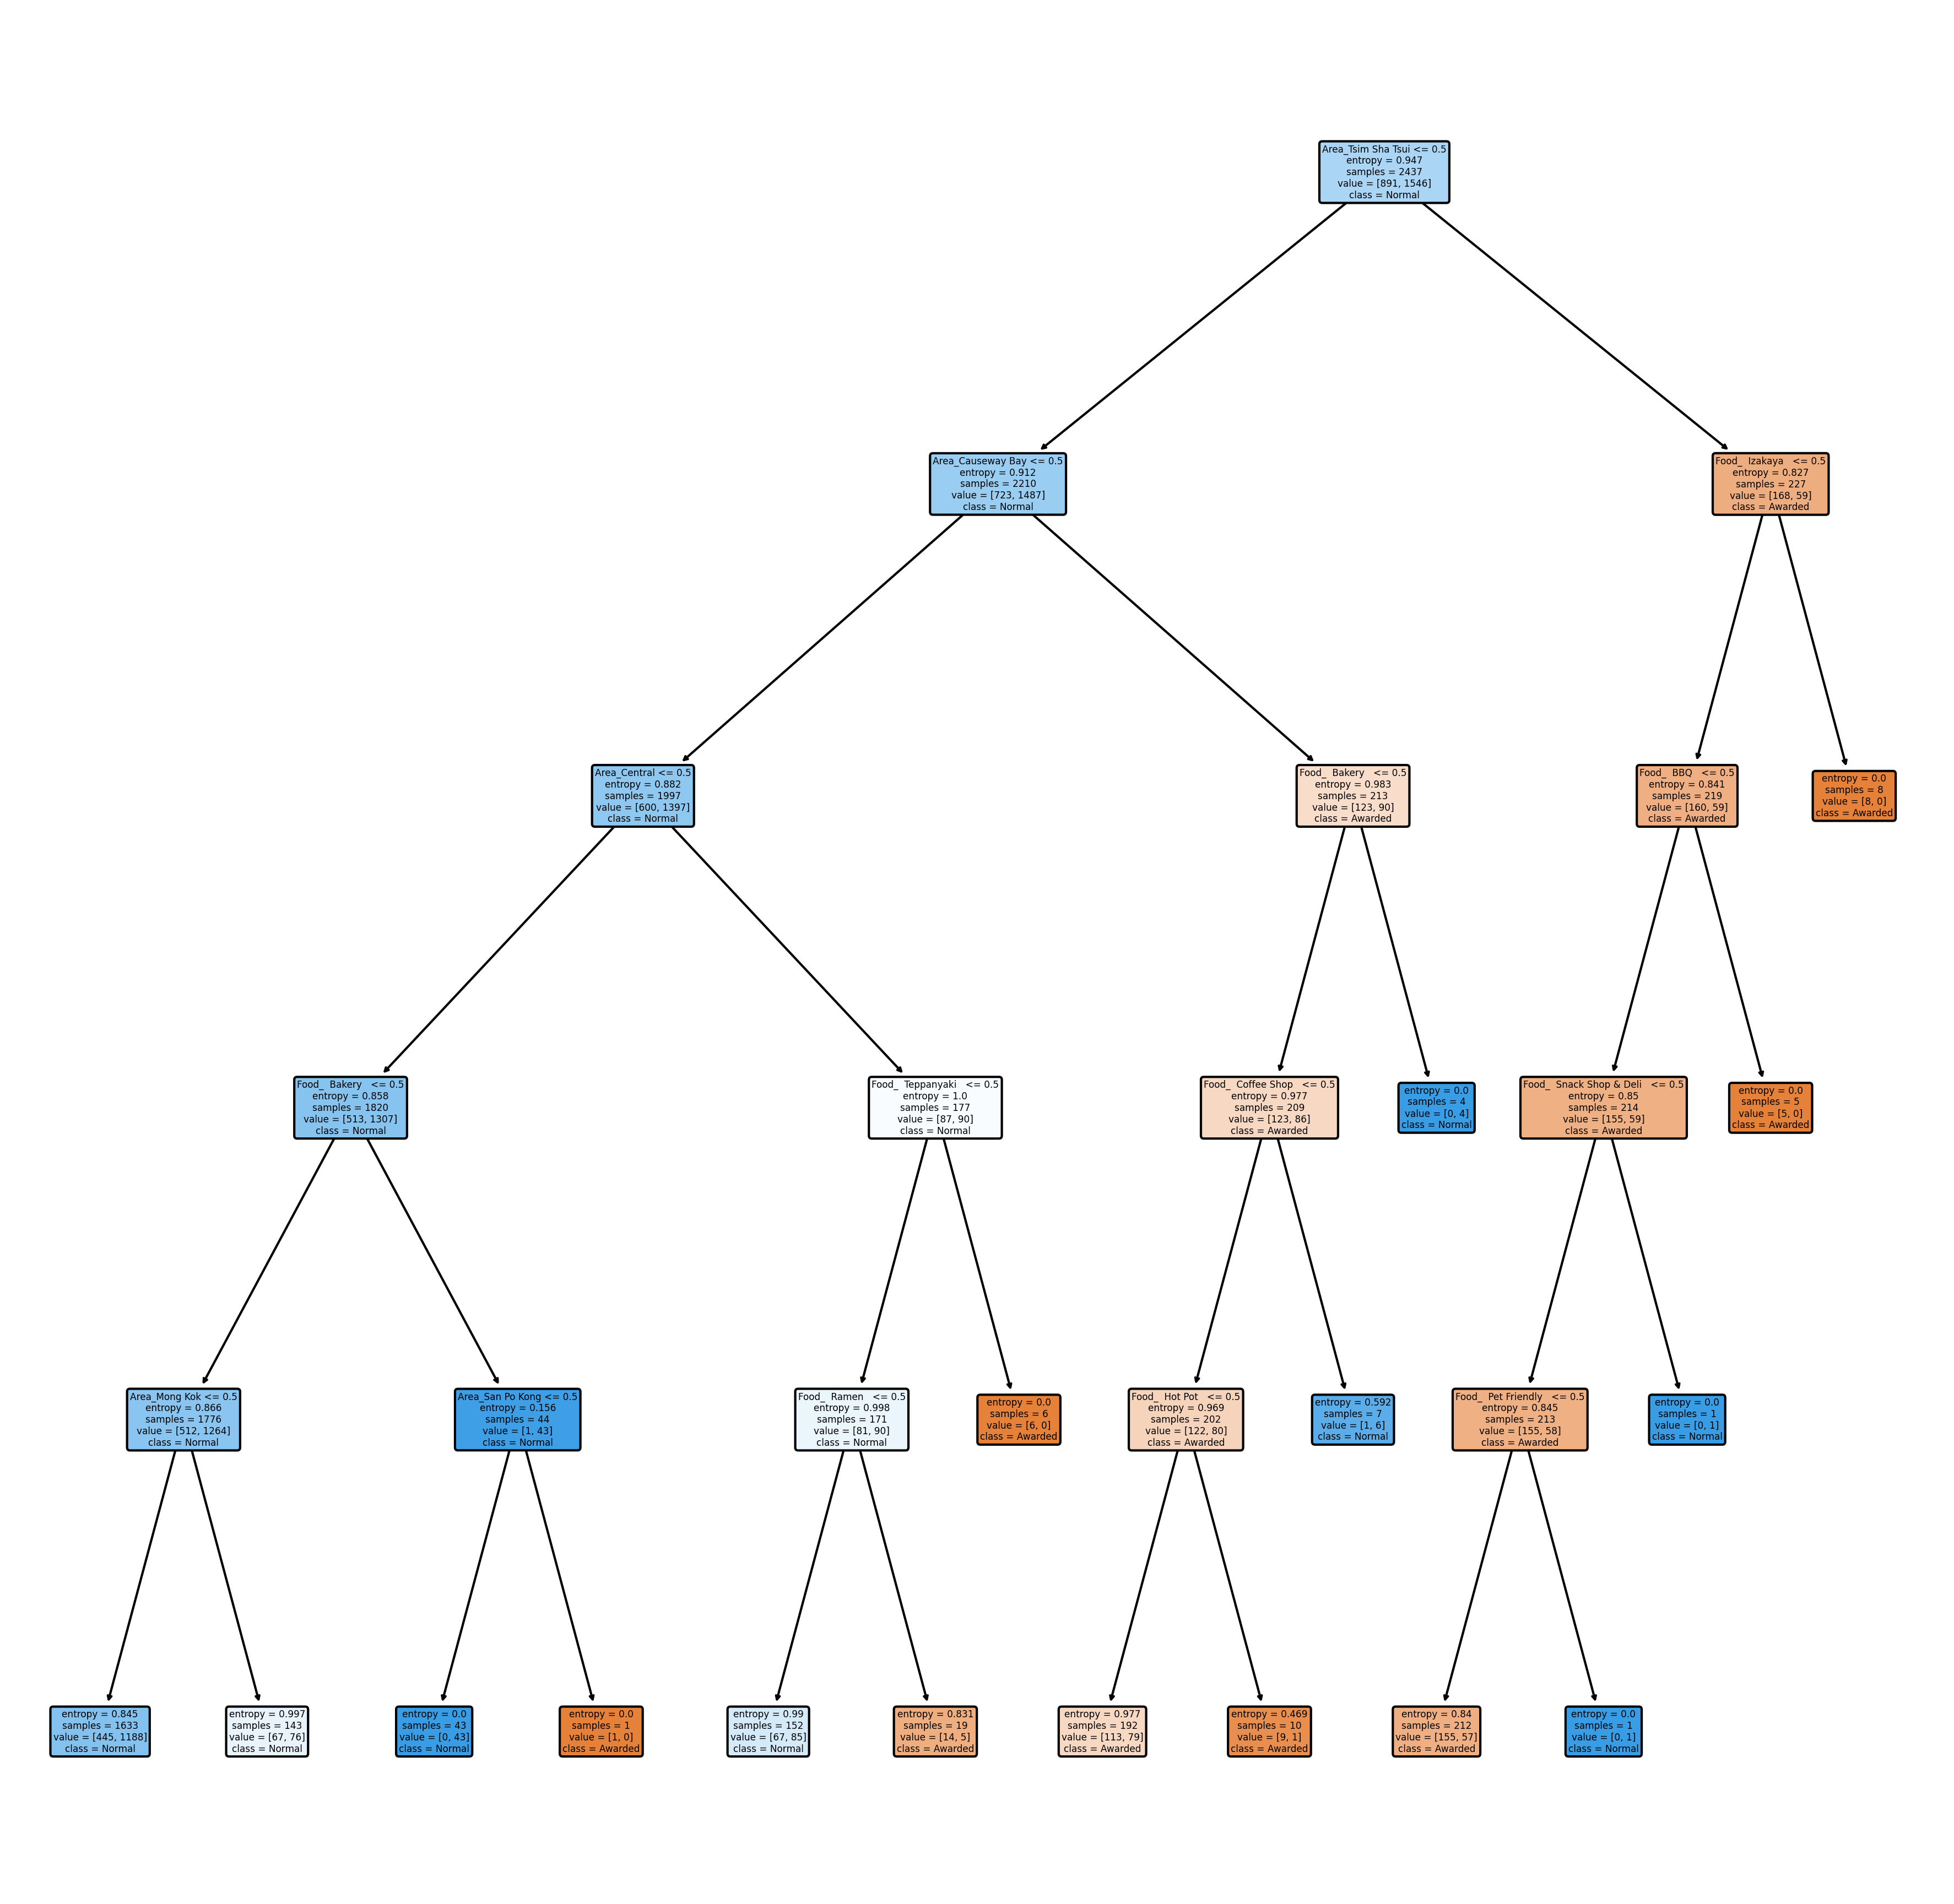

In [54]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
feature_names=DtreeX.columns
plot_tree(model_tree, 
          feature_names = feature_names, 
          class_names = ["Awarded","Normal"], 
          filled = True, 
          rounded = True)

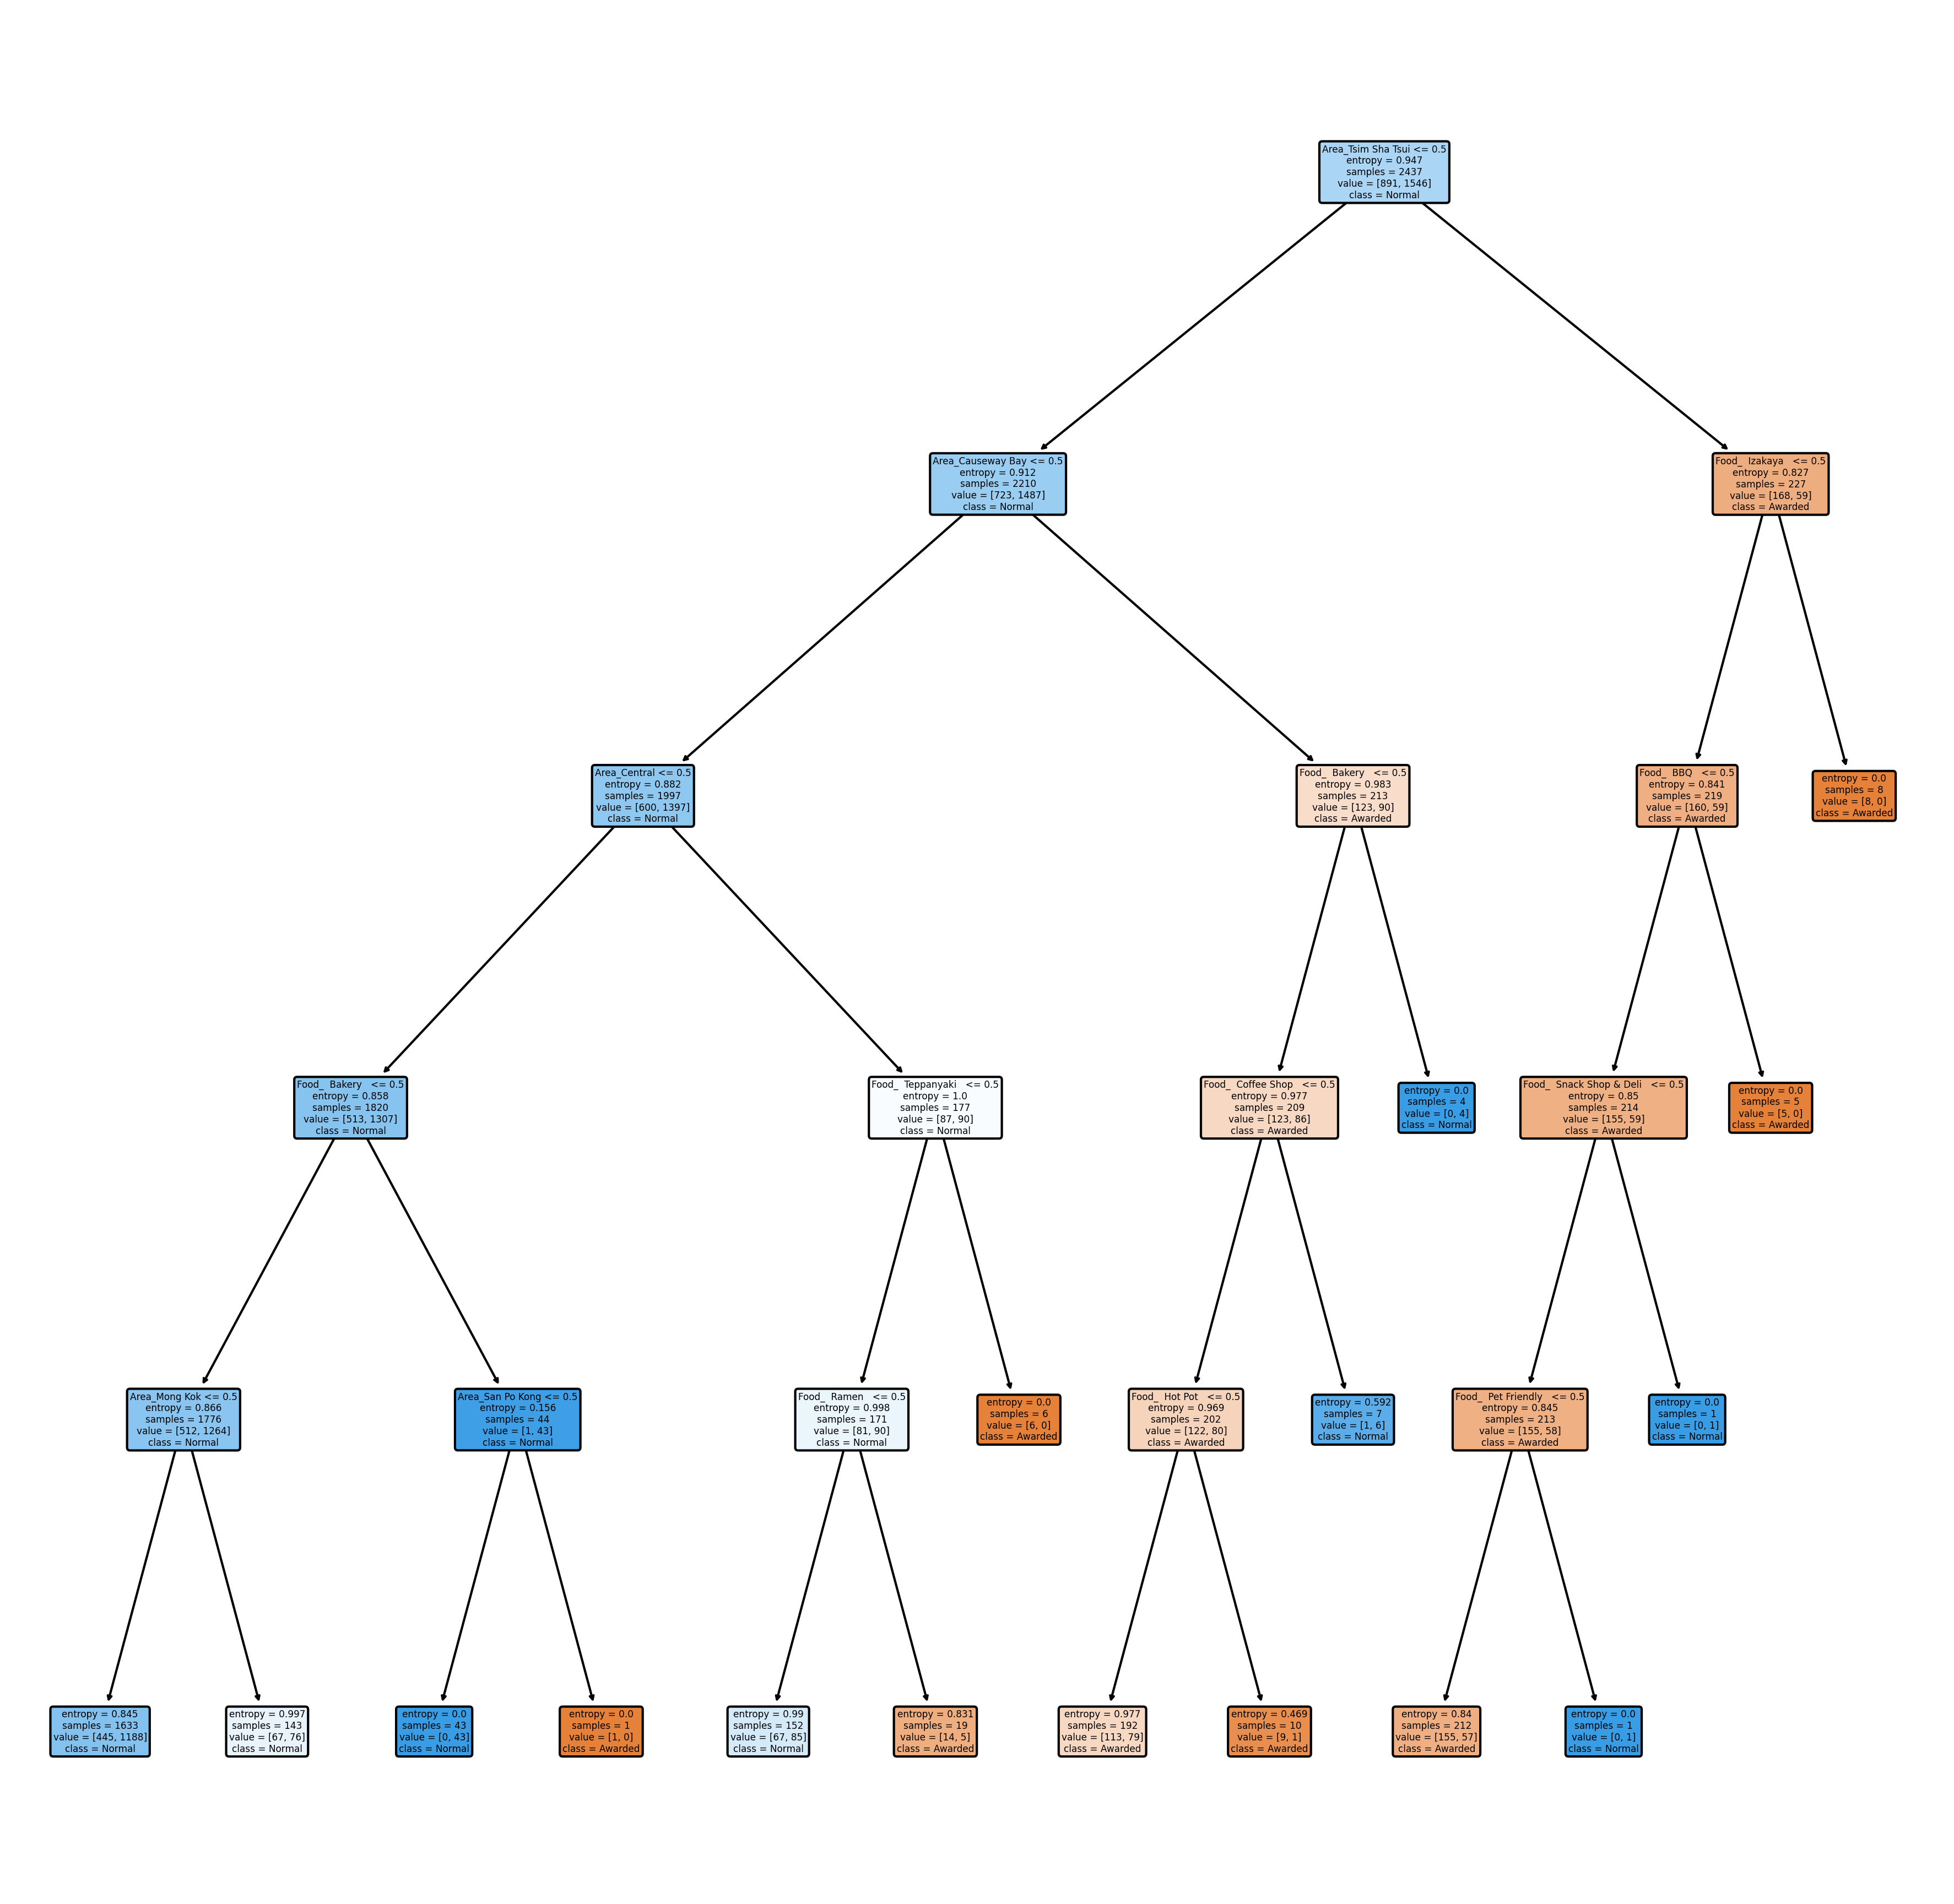

<i>
Here is see the decision tree model. From which we can tell what are the attributes and features that are more deicisive on whether a restaruant are likely to get awarded.

For example, we can say that a japanese restaurant that is not in the CBD of Hong Kong , including the area of Tsim Sha Tsui, Causeway Bay, Central or Mong Kok are very likely not going to be an awarded japanese restaurant, while an Izakaya Japanese restaurant in Tsim Sha Tsui area are much more likely to be an awarded restaurant. 
 </i>


              precision    recall  f1-score   support

     awarded       0.72      0.31      0.43       268
      normal       0.70      0.93      0.80       464

    accuracy                           0.70       732
   macro avg       0.71      0.62      0.62       732
weighted avg       0.71      0.70      0.66       732



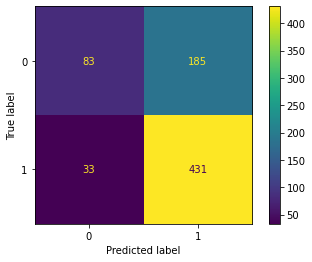

In [55]:
# Here we analyze the tree
# Accuracy = Correct prediction/ sample size
# Precision = True positive/ all positive prediction
# Recall = True positive/ all actual positive
# F1 = balanced measure between precision and recall

# although 0.78 is not extremely high , but it is quite satisfactory for a real life data 

print(classification_report(y_test, model_tree.predict(X_test)))
cm_tree = confusion_matrix(y_test, model_tree.predict(X_test))
ConfusionMatrixDisplay(cm_tree).plot()

<i>And from the confusion metrics above we can see that the f1 score, the balanced measure between precision and recall , and the accuracy is 0.7. 
 
It is noted that the f1-score for normal restaurant group is much higher than that of awarded restaurants'. Hence, the model do a better job in predicting the qualities of a normal restaurant.

Despite that, the model did provide constructive information on what are the areas in hong kong or type of japanese food to avoid or to get attention to when the owners seek to open an japanese restaurants with higher chance of getting awarded.</i>
